In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from tensorflow.keras import layers,models
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,classification_report

In [56]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [57]:
x_train.shape

(50000, 32, 32, 3)

In [58]:
y_train.shape

(50000, 1)

In [59]:
x_test.shape

(10000, 32, 32, 3)

In [60]:
y_test.shape

(10000, 1)

In [61]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

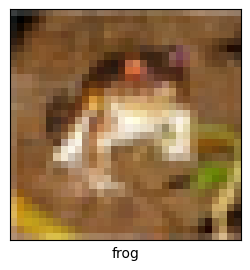

In [62]:
plt.figure(figsize=(3,3))
plt.imshow(x_train[0])
plt.xticks([])
plt.yticks([])
plt.xlabel(classes[y_train.flatten()[0]])
plt.show()

In [63]:
def plot_sample(x,y,n):
    row = int(n / 4)
    col = 4
    for i in range(1,n+1):
        plt.subplot(row,4,i)
        plt.imshow(x_train[i])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(classes[y_train.flatten()[i]])
    plt.tight_layout()
    plt.show()

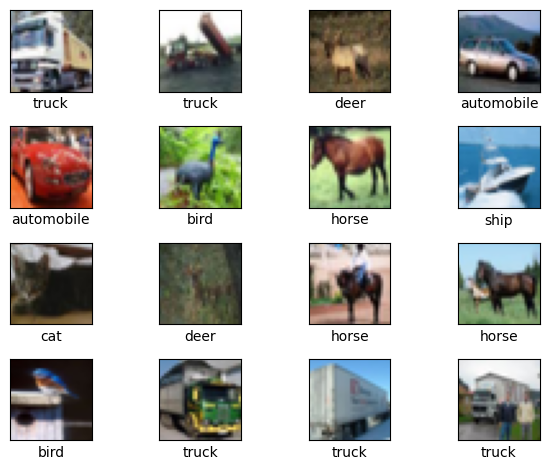

In [64]:
plot_sample(x_train,y_train,16)

In [65]:
scaled_x_train = x_train / 255.
scaled_x_test = x_test / 255.

In [66]:
scaled_x_train.shape

(50000, 32, 32, 3)

In [71]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(layers.MaxPool2D())
cnn.add(layers.Dropout(0.2))
cnn.add(layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
cnn.add(layers.MaxPool2D())
cnn.add(layers.Dropout(0.2))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(units=64,activation='relu'))
cnn.add(layers.Dropout(0.2))
cnn.add(layers.Dense(units=10,activation='softmax'))

In [72]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [74]:
history = cnn.fit(scaled_x_train,y_train,batch_size=32,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5808 - accuracy: 0.4209
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3419 - accuracy: 0.5157
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2345 - accuracy: 0.5579
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1593 - accuracy: 0.5876
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1092 - accuracy: 0.6082
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0617 - accuracy: 0.6211
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0275 - accuracy: 0.6376
Epoch 8/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9995 - accuracy: 0.6463
Epoch 9/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9680 - accuracy: 0.6579
Epoch 10/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.949

In [75]:
cnn.evaluate(scaled_x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8640 - accuracy: 0.7018


[0.8640407919883728, 0.7017999887466431]

In [82]:
pred = cnn.predict(scaled_x_test)

313/313 [==============================] - 1s 2ms/step


In [86]:
y_classes = [np.argmax(e) for e in pred]

In [88]:
y_classes = np.array(y_classes)

In [90]:
np.concatenate((y_test,y_classes.reshape(-1,1)),axis=1)

array([[3, 3],
       [8, 8],
       [8, 8],
       ...,
       [5, 5],
       [1, 2],
       [7, 7]])

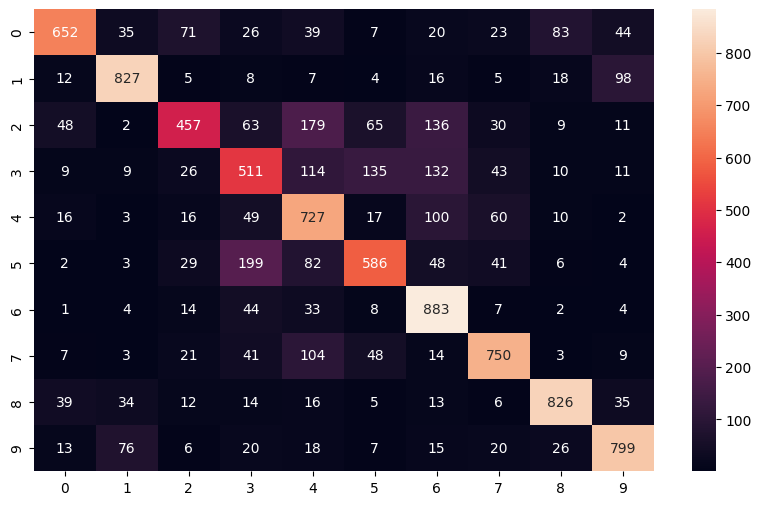

In [94]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test.flatten(),y_classes)
sns.heatmap(cm,annot=True,fmt='.3g')
plt.show()

In [97]:
print(classification_report(y_test.flatten(),y_classes))

              precision    recall  f1-score   support

           0       0.82      0.65      0.72      1000
           1       0.83      0.83      0.83      1000
           2       0.70      0.46      0.55      1000
           3       0.52      0.51      0.52      1000
           4       0.55      0.73      0.63      1000
           5       0.66      0.59      0.62      1000
           6       0.64      0.88      0.74      1000
           7       0.76      0.75      0.76      1000
           8       0.83      0.83      0.83      1000
           9       0.79      0.80      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

